# DA Project - Netflix

In [35]:
! pip install pandas matplotlib seaborn numpy
! pip install matplotlib seaborn
! pip install textblob
! pip install wordcloud
! pip install plotly.express
! pip install squarify
! pip install seaborn

## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import squarify
import seaborn as sns

## Load Data

In [50]:
# Load the data
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

## Review Data

In [51]:
# Get a concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [52]:
# Check for missing data
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64


In [53]:
# Summary statistics for numerical columns
print(netflix_df.describe())

       release_year     duration
count   7787.000000  7787.000000
mean    2013.932580    69.122769
std        8.757395    50.950743
min     1925.000000     1.000000
25%     2013.000000     2.000000
50%     2017.000000    88.000000
75%     2018.000000   106.000000
max     2021.000000   312.000000


## Data Cleaning and Preprocessing 

In [54]:
# --- Cleaning and Preprocessing --- #

# Fill missing string values with 'Unknown' or appropriate placeholder
netflix_df['director'] = netflix_df['director'].fillna('Unknown')

# Convert 'date_added' to datetime, coercing errors to NaT (not a time)
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Remove any rows that still have missing 'date_added' after conversion
netflix_df.dropna(subset=['date_added'], inplace=True)

# Ensure 'release_year' is of type int
netflix_df['release_year'] = netflix_df['release_year'].astype(int)

# Standardize 'country' entries by replacing 'USA' with 'United States'
netflix_df['country'] = netflix_df['country'].replace(r'\bUSA\b', 'United States', regex=True)

# Handle missing values in 'genre' and 'country' if necessary
netflix_df['genre'] = netflix_df['genre'].fillna('Unknown')  # Keeping genres as strings

# Remove duplicates in the DataFrame, if any
netflix_df.drop_duplicates(inplace=True)

print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year  duration  \
0 2020-08-14          2020         4   
1 2016-12-23          2016        93   
2 2018-12-20          2011        78   
3 2017-11-16          2009        80   
4 2020-01-01          2008       123   

                                         de

## Exploratory Analysis

In [55]:
# Basic statistics for numerical data
print(netflix_df.describe())

                          date_added  release_year     duration
count                           7689   7689.000000  7689.000000
mean   2019-01-07 20:44:06.273897728   2013.948498    69.955651
min              2008-01-01 00:00:00   1925.000000     1.000000
25%              2018-02-06 00:00:00   2013.000000     2.000000
50%              2019-03-15 00:00:00   2017.000000    88.000000
75%              2020-01-25 00:00:00   2018.000000   106.000000
max              2021-01-16 00:00:00   2021.000000   312.000000
std                              NaN      8.764980    50.733257


In [56]:
# Understanding distribution among categories such as 'type' and 'genre'
print(netflix_df['type'].value_counts())
print(netflix_df['genre'].value_counts())  # Assuming 'genre' is a single category per show; otherwise, it needs further cleaning.

type
Movie      5377
TV Show    2312
Name: count, dtype: int64
genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
International TV         677
Children                 502
Crime TV                 361
Stand-Up                 353
Kids                     344
Horror Movies            244
British TV               214
Docuseries               184
Anime Series             144
International Movies     114
TV Comedies              102
Reality TV                99
Classic Movies            77
Uncategorized             56
TV Dramas                 55
Thrillers                 49
TV Action                 34
Romantic TV               26
Independent Movies        20
Anime Features            19
Music                     17
Classic                   15
TV Shows                  12
Cult Movies               12
Sci-Fi                    11
TV Horror                 10
Romantic Movies            3
Spanish-Language           2
Spo

In [57]:
# Extracting the year from 'date_added' column
netflix_df['year_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce').dt.year
netflix_df.year_added

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7689, dtype: int32

In [58]:
# Checking the number of content added over the years
content_added_each_year = netflix_df['year_added'].value_counts().sort_index()
print(content_added_each_year.head())

year_added
2008     2
2009     2
2010     1
2011    13
2012     3
Name: count, dtype: int64


## Simple Visualization

In [59]:
# Plotting pie chart for distribution of 'type'
fig = px.pie(netflix_df, names='type', title='Distribution of types of shows/movies on Netflix')
fig.show()

## Yearly Distribution by Type

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
duration                 int64
description             object
genre                   object
year_added             float64
dtype: object


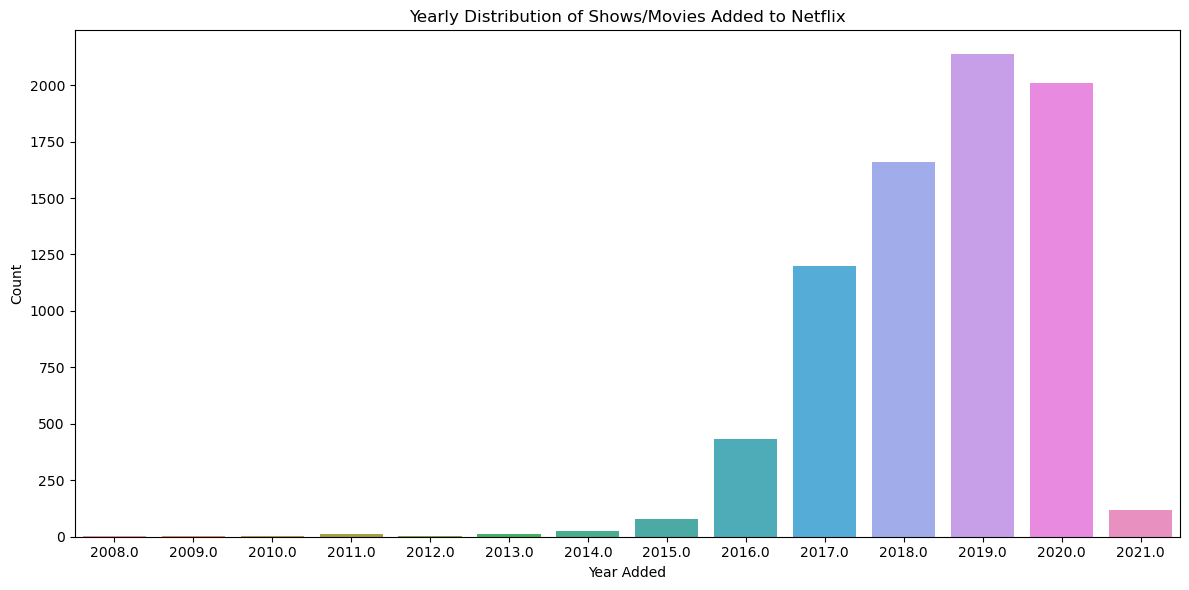

In [78]:
# Check if 'year_added' column exists in the DataFrame
if 'year_added' not in netflix_df.columns:
    # If 'year_added' doesn't exist, we need to create it from 'date_added'
    netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
    netflix_df['year_added'] = netflix_df['date_added'].dt.year

    # Remove rows where 'year_added' could not be extracted
    netflix_df = netflix_df.dropna(subset=['year_added'])

# Check the current data types to confirm 'year_added' is in an appropriate format
print(netflix_df.dtypes)  

if netflix_df['year_added'].dtype not in [int, float]:
    # 'year_added' is not a number, attempt conversion
    netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'], errors='coerce')

# Create a count plot for the 'year_added' column
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=netflix_df)
plt.title('Yearly Distribution of Shows/Movies Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=360)  
plt.tight_layout() 
plt.show()


## Correlation Analysis

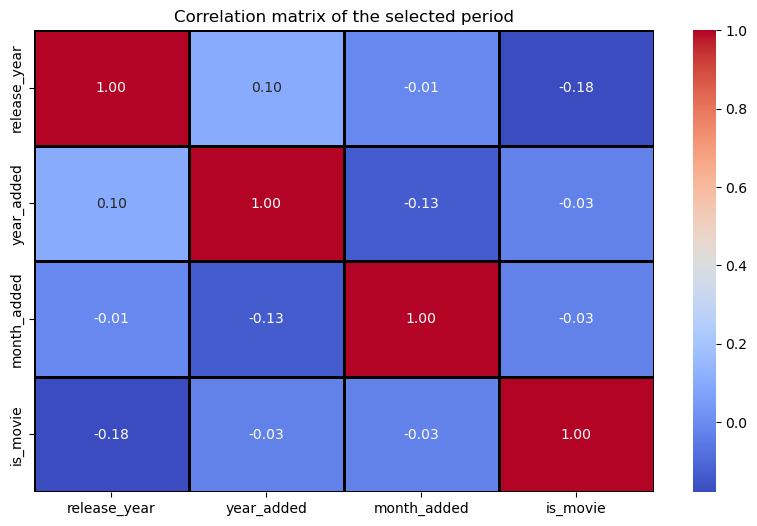

In [61]:
# Convert 'date_added' to string and then strip any leading or trailing spaces
netflix_df['date_added'] = netflix_df['date_added'].astype(str).str.strip()

# Extract 'year_added' and 'month_added' from the cleaned 'date_added' column
netflix_df['year_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce').dt.year
netflix_df['month_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce').dt.month

# Create 'is_movie' binary column (assuming you have a 'type' column)
netflix_df['is_movie'] = (netflix_df['type'] == 'Movie').astype(int)

# Compute the correlation matrix for the adjusted features
selected_features = ['release_year', 'year_added', 'month_added', 'is_movie']
correlation_matrix = netflix_df[selected_features].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=1, linecolor='black')
plt.title("Correlation matrix of the selected period")
plt.show()

#### Overall, the correlations is relatively weak and there are no strong linear relationships between these variables.

## Time Series Analysis

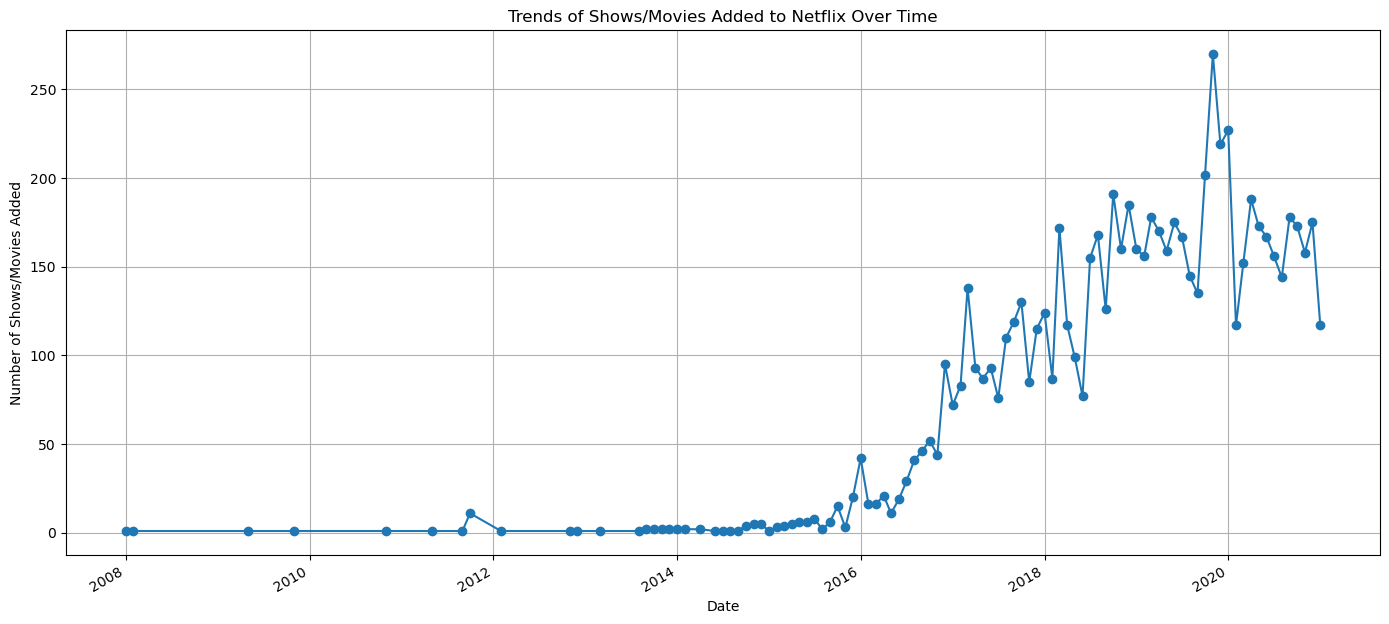

In [83]:
# Sample data input (you would typically read this in from a file or other source)
# netflix_df = pd.read_csv('path_to_your_dataset.csv')

# Convert 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Handle NaNs from date conversion
netflix_df = netflix_df.dropna(subset=['date_added'])

# Extract month and year from 'date_added', then group and count
time_series_data = netflix_df.groupby(netflix_df['date_added'].dt.to_period('M')).size().reset_index(name='counts')
time_series_data['date_added'] = time_series_data['date_added'].dt.to_timestamp()

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['date_added'], time_series_data['counts'], marker='o', linestyle='-')
plt.title('Trends of Shows/Movies Added to Netflix Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Shows/Movies Added')
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()



## Text Analysis

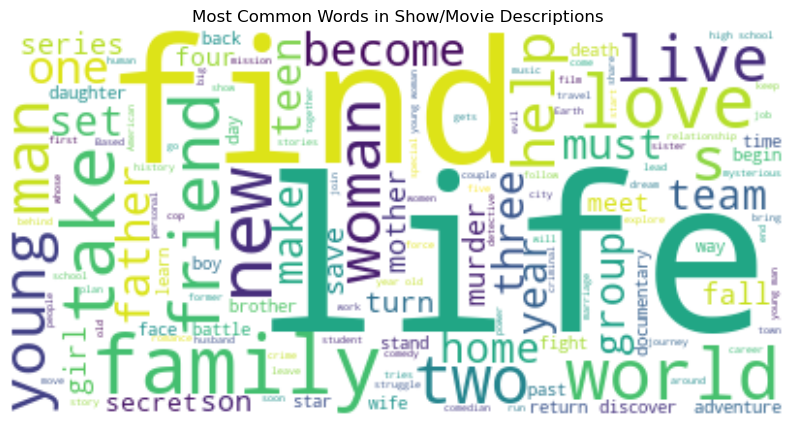

In [84]:
# Combining all descriptions
text = ' '.join(description for description in netflix_df['description'] if description)

# Create and display a word cloud
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Show/Movie Descriptions')
plt.show()

## The top 10 movies and top 10 TV series

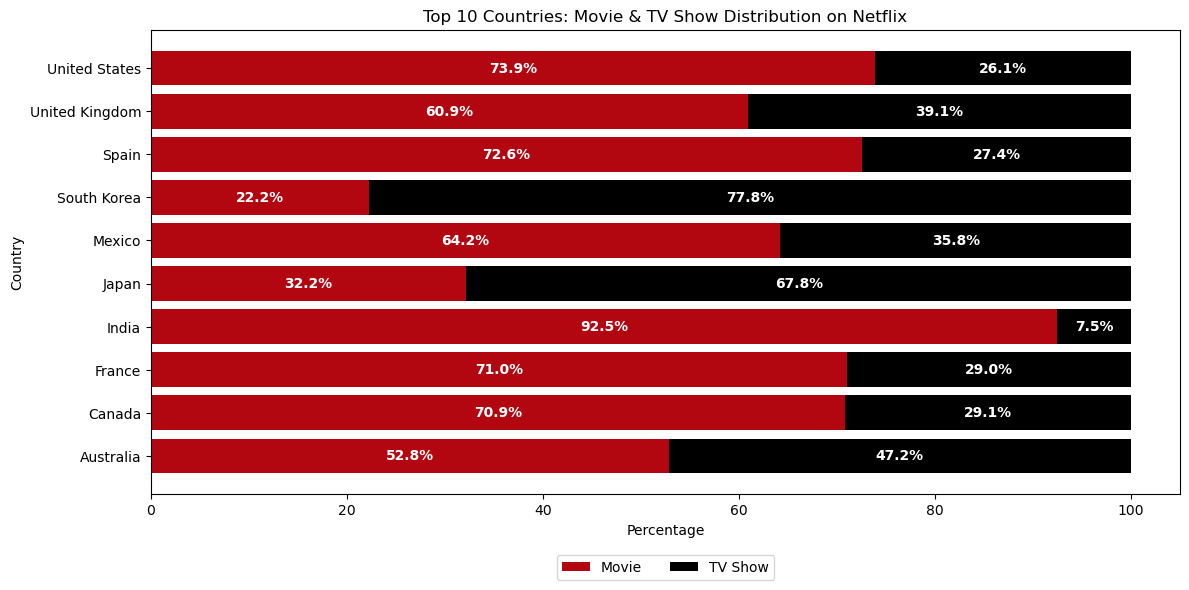

In [85]:
# Filter the DataFrame for the top 10 countries
top_10_countries = netflix_df['country'].value_counts().head(10).index.tolist()
filtered_data = netflix_df[netflix_df['country'].isin(top_10_countries)]

# Pivot the data to get counts for Movie and TV Show for each country
pivot_table = pd.pivot_table(filtered_data, index='country', columns='type', values='show_id', aggfunc='count', fill_value=0)

# Calculate the total content count for each country
pivot_table['Total'] = pivot_table['Movie'] + pivot_table['TV Show']

# Calculate the percentage of Movie and TV Show for each country
pivot_table['Movie %'] = (pivot_table['Movie'] / pivot_table['Total']) * 100
pivot_table['TV Show %'] = (pivot_table['TV Show'] / pivot_table['Total']) * 100

# Create a percent stacked horizontal bar chart
plt.figure(figsize=(12, 6))

# Stacked bar chart
bars1 = plt.barh(pivot_table.index, pivot_table['Movie %'], label='Movie', color='#b20710')
bars2 = plt.barh(pivot_table.index, pivot_table['TV Show %'], label='TV Show', left=pivot_table['Movie %'], color='black')

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Top 10 Countries: Movie & TV Show Distribution on Netflix')

# Add percentage labels to the bars
for bar in bars1 + bars2:
    width = bar.get_width()
    if width > 5:  # Only add text if the bar is long enough
        plt.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}%', va='center', ha='center', color='white', fontweight='bold')

# Customize legend position to the right with padding
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderaxespad=0.5)

plt.tight_layout()
plt.show()


In [86]:
# Load the data
netflix_df = pd.read_csv('netflix_data.csv')

# Filter out the top 10 recent movies and TV series
top_movies = netflix_df[netflix_df['type'] == 'Movie'].nlargest(5, 'release_year')
top_tv_series = netflix_df[netflix_df['type'] == 'TV Show'].nlargest(5, 'release_year')

# Display the top 10 movies
print("Top 10 Movies:")
print(top_movies[['title', 'release_year']])

# Display a separator for clarity
print("\n" + "-"*50 + "\n")

# Display the top 10 TV series
print("Top 10 TV Series:")
print(top_tv_series[['title', 'release_year']])


Top 10 Movies:
                                                  title  release_year
1285                                           Charming          2021
1355  Chris Rock Total Blackout: The Tamborine Exten...          2021
1514            Crack: Cocaine, Corruption & Conspiracy          2021
1528                        Creating The Queen's Gambit          2021
4710                                   Outside the Wire          2021

--------------------------------------------------

Top 10 TV Series:
                    title  release_year
980          Bling Empire          2021
1222      Carmen Sandiego          2021
1440            Cobra Kai          2021
1780       Disenchantment          2021
1864  Dream Home Makeover          2021


In [66]:
# Load the data
netflix_df = pd.read_csv('netflix_data.csv')

# Filter the data to only include shows/movies released in or after 2020
recent_netflix_df = netflix_df[netflix_df['release_year'] >= 2020]

# Group by genre and count the number of movies/TV shows for each genre
genre_counts = recent_netflix_df['genre'].value_counts().nlargest(10).reset_index()
genre_counts.columns = ['genre', 'count']

# Plotting the top 10 genres using a pie chart
fig = px.pie(genre_counts, names='genre', values='count', title='Top 10 Genres from 2020 onwards',
             color_discrete_sequence=px.colors.sequential.Plasma)

fig.show()



In [67]:
# Filter the data to only include shows/movies released in or after 2015
recent_netflix_df_2015 = netflix_df[netflix_df['release_year'] >= 2015]

# Group by country and count the number of movies/TV shows for each country
country_counts = recent_netflix_df_2015['country'].value_counts().nlargest(5).reset_index()
country_counts.columns = ['country', 'count']

# Plotting the top 5 countries with most productions
fig = px.bar(country_counts, x='country', y='count', title='Top 5 Countries by Number of Shows/Movies from 2015 onwards',
             labels={'country': 'Country', 'count': 'Number of Shows/Movies'},
             color='count', color_continuous_scale='Viridis')

fig.show()


In [68]:
# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter the data for the specified years
recent_netflix_df = netflix_df[netflix_df['release_year'].isin(years_of_interest)]

# Group by country and count the number of movies/TV shows for each country
country_counts = recent_netflix_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Identify the top country
top_country_name = country_counts.iloc[0]['country']

# Filter the data for only the top country
top_country_data = recent_netflix_df[recent_netflix_df['country'] == top_country_name]

# Group by release_year and count the number of shows/movies for each year
yearly_counts = top_country_data.groupby('release_year').size().reset_index()
yearly_counts.columns = ['year', 'count']

# Custom color scale: dark blue to medium blue
custom_color_scale = ['#4169E1','#000080']

# Plotting year to year comparison for the specified years
fig = px.bar(yearly_counts, x='year', y='count',
             title=f'Yearly Shows/Movies Production in {top_country_name} (2016-2020)',
             labels={'year': 'Year', 'count': 'Number of Shows/Movies'},
             color='count', color_continuous_scale=custom_color_scale)

# Remove color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

In [69]:
# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter the data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Group by release_year and type, then count the number of each type for each year
yearly_type_counts = us_netflix_df.groupby(['release_year', 'type']).size().reset_index()
yearly_type_counts.columns = ['year', 'type', 'count']

# Plotting year to year comparison of types for the United States
fig = px.bar(yearly_type_counts, x='year', y='count', color='type',
             title='Yearly Comparison of Movie vs TV Show Production in the United States (2016-2020)',
             labels={'year': 'Year', 'count': 'Number of Shows/Movies', 'type': 'Type'},
             barmode='stack')

fig.show()


In [70]:
# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter the data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Assuming each entry has only one genre (if genres are comma-separated or multiple, you'd need to preprocess this)
# Group by release_year and genre, then count the number of each genre for each year
yearly_genre_counts = us_netflix_df.groupby(['release_year', 'genre']).size().reset_index()
yearly_genre_counts.columns = ['year', 'genre', 'count']

# Plotting year to year comparison of genres for the United States
fig = px.bar(yearly_genre_counts, x='year', y='count', color='genre',
             title='Yearly Breakdown of Genres for Productions in the United States (2016-2020)',
             labels={'year': 'Year', 'count': 'Number of Shows/Movies', 'genre': 'Genre'},
             barmode='stack')

fig.show()


In [71]:
# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Identify top 5 genres across all years combined
top_5_genres = us_netflix_df['genre'].value_counts().nlargest(5).index.tolist()

# Filter data for only the top 5 genres
us_top_genres_df = us_netflix_df[us_netflix_df['genre'].isin(top_5_genres)]

# Group by release year and genre, then count the number of movies/TV shows
year_genre_counts = us_top_genres_df.groupby(['release_year', 'genre']).size().reset_index()
year_genre_counts.columns = ['year', 'genre', 'count']

# Plotting year to year comparison of top 5 genres
fig = px.bar(year_genre_counts, x='year', y='count', color='genre', barmode='group',
             title='Yearly Comparison of Top 5 Genres in the United States (2016-2020)',
             labels={'year': 'Year', 'count': 'Number of Shows/Movies', 'genre': 'Genre'})

fig.show()


In [72]:
# Specify the range of years you're interested in
years_of_interest = [2018, 2019, 2020]

# Filter the data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# For each year, plot a pie chart
for year in years_of_interest:
    yearly_data = us_netflix_df[us_netflix_df['release_year'] == year]
    genre_counts = yearly_data['genre'].value_counts().reset_index()
    genre_counts.columns = ['genre', 'count']
    
    fig = px.pie(genre_counts, names='genre', values='count',
                 title=f'Genre Distribution in {year} for Productions in the United States')
    fig.show()


In [73]:
# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Identify least 5 genres across all years combined
least_5_genres = us_netflix_df['genre'].value_counts().nsmallest(5).index.tolist()

# Filter data for only the least 5 genres
us_least_genres_df = us_netflix_df[us_netflix_df['genre'].isin(least_5_genres)]

# Group by release year and genre, then count the number of movies/TV shows
year_genre_counts = us_least_genres_df.groupby(['release_year', 'genre']).size().reset_index()
year_genre_counts.columns = ['year', 'genre', 'count']

# Plotting year to year comparison of least 5 genres
fig = px.bar(year_genre_counts, x='year', y='count', color='genre', barmode='group',
             title='Yearly Comparison of Least 5 Genres in the United States (2016-2020)',
             labels={'year': 'Year', 'count': 'Number of Shows/Movies', 'genre': 'Genre'})

fig.show()


In [74]:
# Load the data
netflix_df = pd.read_csv('netflix_data.csv')

# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Group by release year and type, then count the number of each type
year_type_counts = us_netflix_df.groupby(['release_year', 'type']).size().reset_index()
year_type_counts.columns = ['year', 'type', 'count']

# Plotting bar chart comparison of type for each year
fig = px.bar(year_type_counts, x='year', y='count', color='type', 
             title='Production Types in the United States (2016-2020)', 
             labels={'year': 'Year', 'count': 'Number of Shows/Movies'},
             barmode='group')

fig.show()



In [75]:

# Specify the range of years you're interested in
years_of_interest = [2016, 2017, 2018, 2019, 2020]

# Filter data for the specified years and for the United States
us_netflix_df = netflix_df[(netflix_df['release_year'].isin(years_of_interest)) & 
                           (netflix_df['country'] == 'United States')]

# Group by director and count the number of each type
director_counts = us_netflix_df['director'].value_counts().nlargest(10).reset_index()
director_counts.columns = ['director', 'count']

# Plotting bar chart comparison of top directors
fig = px.bar(director_counts, y='director', x='count', 
             title='Top 10 Directors in the United States (2016-2020)', 
             labels={'director': 'Director', 'count': 'Number of Shows/Movies'})

fig.show()


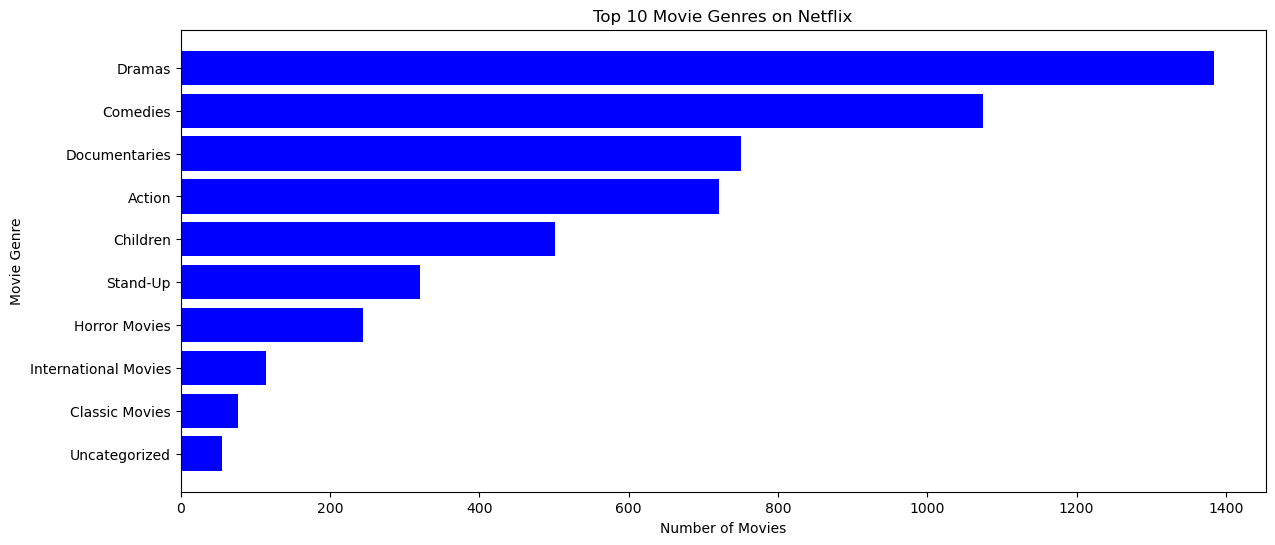

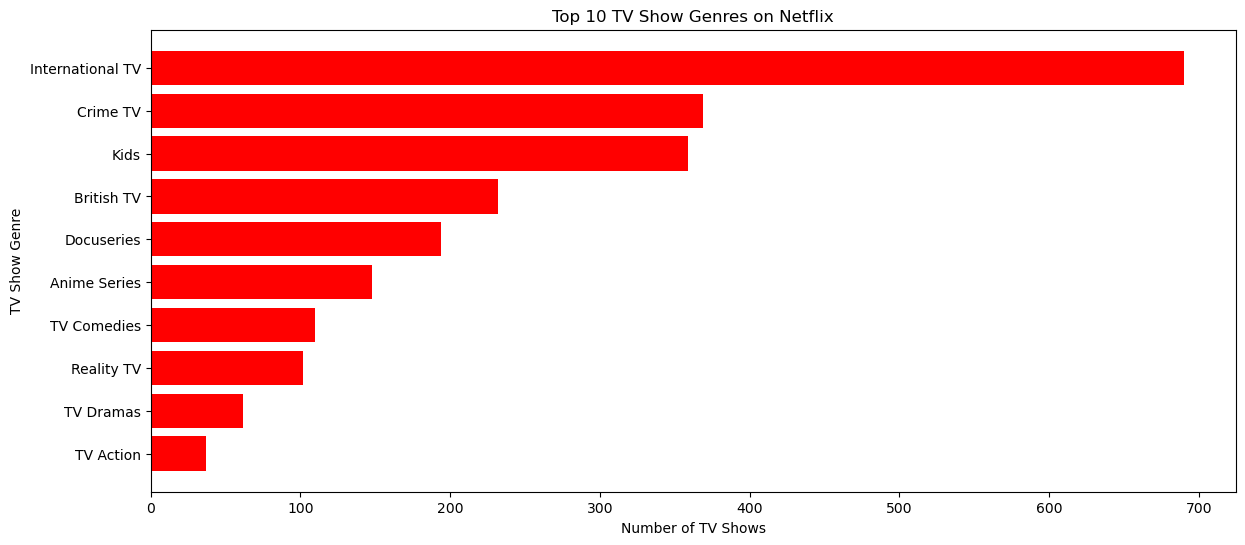

In [76]:
# Group by type and genre and count
genre_counts = netflix_df.groupby(['type', 'genre']).size().reset_index(name='count')

# Filter and sort top 10 movie genres
top_10_movie_genres = genre_counts[genre_counts['type'] == 'Movie'].nlargest(10, 'count')

# Filter and sort top 10 TV show genres
top_10_tvshow_genres = genre_counts[genre_counts['type'] == 'TV Show'].nlargest(10, 'count')

# Plot top 10 movie genres
plt.figure(figsize=(14, 6))
plt.barh(top_10_movie_genres['genre'], top_10_movie_genres['count'], color='blue')
plt.xlabel('Number of Movies')
plt.ylabel('Movie Genre')
plt.title('Top 10 Movie Genres on Netflix')
plt.gca().invert_yaxis()  # To display the most common genre at the top
plt.show()

# Plot top 10 TV show genres
plt.figure(figsize=(14, 6))
plt.barh(top_10_tvshow_genres['genre'], top_10_tvshow_genres['count'], color='red')
plt.xlabel('Number of TV Shows')
plt.ylabel('TV Show Genre')
plt.title('Top 10 TV Show Genres on Netflix')
plt.gca().invert_yaxis() 
plt.show()
